In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("winequality-red.csv", sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
data.duplicated().value_counts()

False    1359
True      240
dtype: int64

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


<AxesSubplot:>

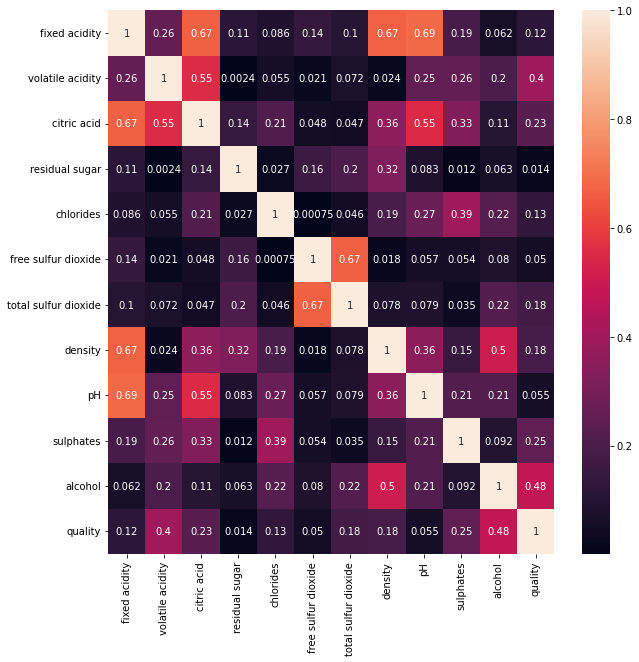

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr().abs(), annot=True)

In [9]:
bins = (2, 6.5, 8)
labels = [0, 1]
data['quality'] = pd.cut(x = data['quality'], bins = bins, labels = labels)

In [10]:
data["quality"].value_counts()

0    1175
1     184
Name: quality, dtype: int64

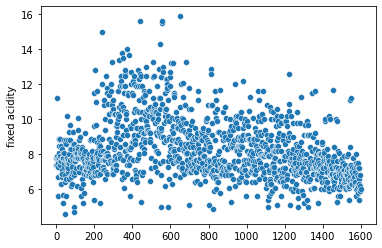

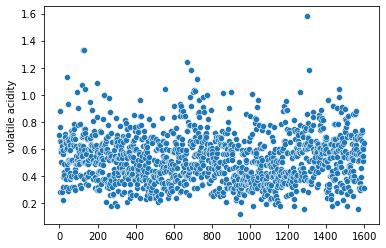

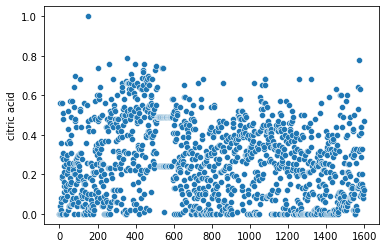

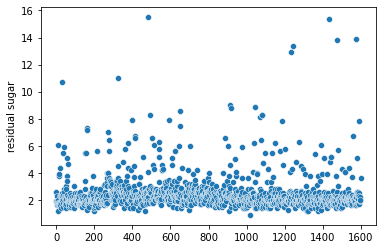

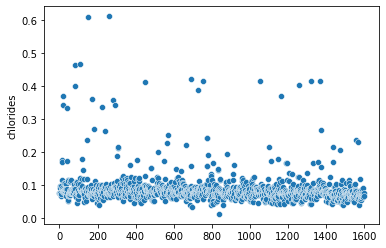

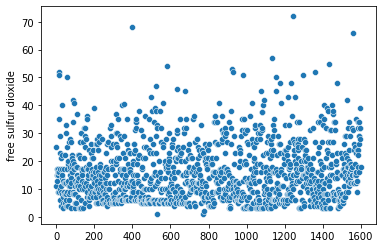

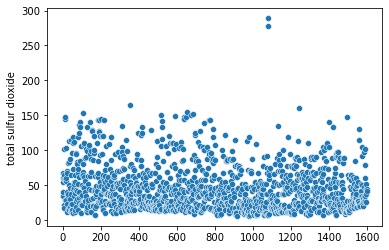

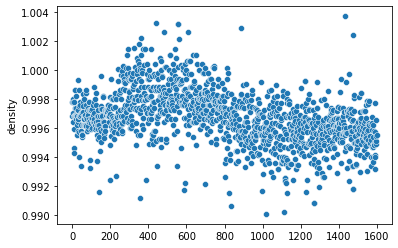

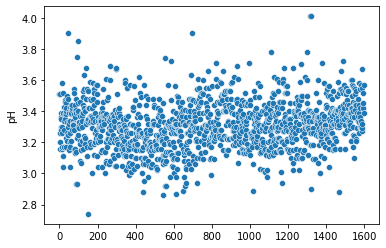

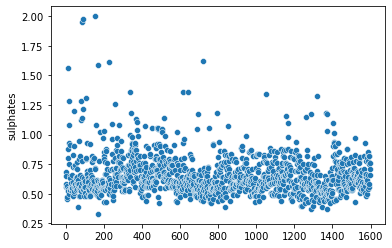

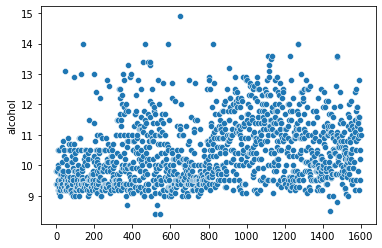

In [11]:
for column in data.columns[:-1]:
    sns.scatterplot(data=data, x=data.index, y=column)
    plt.show()

In [13]:
for column in data.columns[:-1]:
    selected_column = data[column]
    
    q1 = selected_column.quantile(q=0.25)
    q3 = selected_column.quantile(q=0.75)
    
    iqr = q3 - q1
    
    minimum = q1 - 1.5*iqr
    maximum = q3 + 1.5*iqr
    
    max_idxs = data[selected_column > maximum].index
    min_idxs = data[selected_column < minimum].index
    
    data.drop(index=max_idxs, inplace=True)
    data.drop(index=min_idxs, inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         985 non-null    float64 
 1   volatile acidity      985 non-null    float64 
 2   citric acid           985 non-null    float64 
 3   residual sugar        985 non-null    float64 
 4   chlorides             985 non-null    float64 
 5   free sulfur dioxide   985 non-null    float64 
 6   total sulfur dioxide  985 non-null    float64 
 7   density               985 non-null    float64 
 8   pH                    985 non-null    float64 
 9   sulphates             985 non-null    float64 
 10  alcohol               985 non-null    float64 
 11  quality               985 non-null    category
dtypes: category(1), float64(11)
memory usage: 125.7 KB


<AxesSubplot:>

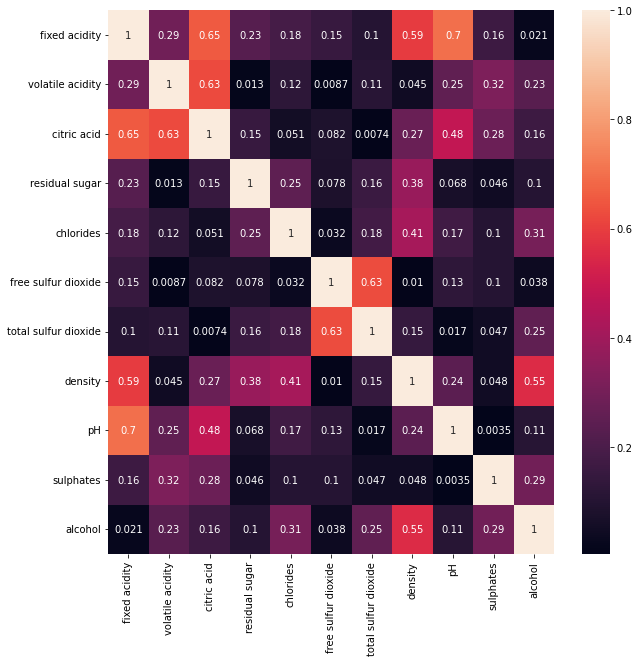

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr().abs(), annot=True)

In [16]:
data["quality"].value_counts()

0    860
1    125
Name: quality, dtype: int64

In [17]:
X = data.drop("quality", axis=1)
y = data["quality"]

In [18]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X, y, test_size=0.25, random_state=10)

In [19]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [20]:
Xtrain_o, ytrain_o = sm.fit_resample(Xtrain, ytrain)

In [21]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators = 200, random_state=0)
rfc.fit(Xtrain_o, ytrain_o)

ypred1 = rfc.predict(Xtest)

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
confusion_matrix(ytest, ypred1)

array([[191,  24],
       [ 12,  20]], dtype=int64)

In [24]:
print(classification_report(ytest, ypred1))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       215
           1       0.45      0.62      0.53        32

    accuracy                           0.85       247
   macro avg       0.70      0.76      0.72       247
weighted avg       0.88      0.85      0.86       247



In [25]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(Xtrain_o, ytrain_o)

ypred2 = xgb.predict(Xtest)

In [26]:
confusion_matrix(ytest, ypred2)

array([[193,  22],
       [ 16,  16]], dtype=int64)

In [27]:
print(classification_report(ytest, ypred2))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       215
           1       0.42      0.50      0.46        32

    accuracy                           0.85       247
   macro avg       0.67      0.70      0.68       247
weighted avg       0.86      0.85      0.85       247

